In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

# Default Bank Data.

In [2]:
data_path='C:/Users/xg16060/OneDrive - APG/dev_data/interestProfile/'
bank_data = pd.read_csv(data_path+'bank-full.csv', sep=';')

#bank_data= bank_data.iloc[:,1:]
bank_data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank_data = bank_data.dropna()

In [4]:
bank_data.fillna('unknown', inplace=True)
bank_data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
import numpy as np

#bank_data = pd.read_csv('./adult.data', sep=',' ,header=None) CENSUS DATA

y = bank_data.iloc[:,-1]

#student_data = student_data.iloc[:,0:-1]
bank_data = bank_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
bank_data.replace('?',np.nan,inplace=True)

bank_data.dropna(inplace=True)
bank_data= bank_data[(bank_data=='?')==False]



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
print(bank_data.columns[bank_data.dtypes=='object'])

bank_data.dtypes

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
#del bank_data['Churn']

object_columns = list(bank_data.columns[bank_data.dtypes=='object'])

object_columns



['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [9]:
(y=='yes').apply(int)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [10]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
# import labelencoder
from sklearn.preprocessing import LabelEncoder, StandardScaler# instantiate labelencoder object
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier


le = LabelEncoder()



from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in object_columns }

for col in object_columns:
    bank_data[col] = le_dict[col].fit_transform(bank_data[col])
    
    


#iris = load_breast_cancer()
#X = bank_data.iloc[:,1:-1]
X = bank_data.iloc[:,0:-1]

#y = bank_data.iloc[:,-1]#(student_data['target']=='ad.').apply(int)
y = (y=='yes').apply(int) #(student_data['target']=='ad.').apply(int)

#y = (bank_data.iloc[:,-1]=='yes').apply(int) #(student_data['target']=='ad.').apply(int)


#label encoding.

#le_dict[col].transform(df_another[col])


#X = pd.get_dummies(X, prefix_sep='_', drop_first=True) #One hot encoding, assuming complet knowledge of vocabulary

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 ,test_size=0.4 )

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=0 ,test_size=0.8 )

In [11]:
X_train
X_test
X_val

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
30937,27,10,2,1,0,154,0,0,1,9,3,24,5,-1,0,3
27505,53,6,2,1,0,731,0,0,0,21,9,251,2,-1,0,3
24902,41,7,1,1,0,446,1,0,0,18,9,296,1,186,1,2
4249,36,0,2,1,0,3457,0,0,2,19,8,103,4,-1,0,3
31466,59,5,1,1,0,1035,1,1,0,1,0,126,2,239,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,55,9,0,2,0,56,0,0,0,27,1,94,6,-1,0,3
18095,39,7,1,1,0,1116,1,0,0,30,5,486,2,-1,0,3
19738,32,4,1,2,0,183,1,0,0,7,1,112,3,-1,0,3
3937,45,1,1,0,0,71,1,0,2,16,8,355,2,-1,0,3


In [12]:
features = np.shape(X_train)[1]
features

16

In [28]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

# Visualization of Decision Tree

# GRID SEARCHES with Node Transformer

In [15]:
%load_ext autoreload
%autoreload 2

In [16]:
seq_number = 50
depth = 5
dimension = 10

In [17]:
# example of usage of NodeTransformer
from NodeTransformer import NodeTransformer




ndt = NodeTransformer(n_estimators=seq_number,dimension=dimension, max_depth=depth, random_state = 0)


ndt.fit(X_train,y_train)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.59it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.83it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.84it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.02it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.72it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.08it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.63it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.44it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.41it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.08it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.39it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 53.82it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.55it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.18it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.18it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.96it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.71it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.40it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.95it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.35it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.41it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.17it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.48it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.40it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.84it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.48it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.81it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.34it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.23it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.75it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.62it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.85it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.70it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.25it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.36it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.33it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.04it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.60it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.87it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.08it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.81it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.54it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.35it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.76it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.95it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.74it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.76it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.66it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.48it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.27it/s]


NodeTransformer(dimension=10, impurity_reweight=True, max_depth=5,
        mode='Extended', n_estimators=50, n_walks=50, random_state=0,
        walk_length=5, window=5)

In [18]:
X_train_transformed = ndt.transform_matrix(X_train)

print(np.shape(X_train_transformed))

X_test_transformed = ndt.transform_matrix(X_test)
X_val_transformed = ndt.transform_matrix(X_val)

0it [00:00, ?it/s]

(27126, 10, 50)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [19]:

X_train_transformed = np.transpose(X_train_transformed, (0, 2, 1))
X_test_transformed = np.transpose(X_test_transformed, (0, 2, 1))
X_val_transformed = np.transpose(X_val_transformed, (0, 2, 1))

print(np.shape(X_train_transformed))
print(np.shape(X_test_transformed))

(27126, 50, 10)
(14468, 50, 10)


In [20]:
X_train_transformed[0,2:7,:]

array([[ 5.09527385e-01,  5.37955940e-01,  3.94710302e-01,
        -3.24108452e-01, -2.64956266e-01, -6.60456538e-01,
        -7.10380301e-02,  7.84604609e-01, -4.24877912e-01,
         2.84009427e-01],
       [ 5.72587490e-01, -5.07877648e-01,  9.96514976e-01,
         1.14024043e-01, -4.23516899e-01, -6.26914948e-02,
         1.92067981e-01,  2.44639125e-02,  3.00941199e-01,
        -5.67326367e-01],
       [ 1.34925529e-01,  7.45502941e-04,  4.68837976e-01,
         7.33609438e-01, -2.81058669e-01, -5.44896305e-01,
        -1.29778489e-01,  4.06639457e-01, -2.57763714e-01,
         1.03629306e-01],
       [ 2.44488120e-01, -2.32170671e-01,  8.10336947e-01,
        -2.16700941e-01, -9.65442136e-02, -8.15364301e-01,
         2.43054762e-01,  9.03576374e-01,  1.30369514e-02,
         6.57589436e-02],
       [-3.48750614e-02, -3.22757870e-01,  7.50201583e-01,
         7.54046857e-01, -2.63132364e-01, -1.54876351e-01,
        -6.95149302e-01,  1.92086026e-01, -2.75172368e-02,
        -6.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
import pickle



param_grid = {'rfne__n_estimators':[50, 100, 200],
                   'rfne__max_depth':[5],'rfne__dimension' : [10]}

grid_results = []


for i,ii in tqdm(enumerate(param_grid['rfne__n_estimators'])):
    for j,jj in enumerate(param_grid['rfne__max_depth']):
        for k,kk in enumerate(param_grid['rfne__dimension']):
            
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=ii,max_depth=jj,dimension=kk)), ('logreg',LogisticRegression())]

            pipe = Pipeline(estimators)
            auc = cross_validate(pipe,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = -1, verbose=1 )
            auc['pars'] = [ii,jj,kk]
            print(auc)
            grid_results.append(auc)
            pickle.dump(grid_results, open('grid_res_default.pkl','wb'))


In [96]:
import pickle

pickle.dump(grid_results, open('grid_res.pkl','wb'))

In [60]:
grid_results


[{'fit_time': array([72.89865279, 76.02229881, 75.3750298 , 72.37605309, 64.37732291,
         65.12831426, 66.71780515, 66.7747004 , 50.05456042, 48.89764094]),
  'score_time': array([2.31381226, 1.7694788 , 1.84033775, 2.29785347, 2.6638763 ,
         2.5920682 , 2.42750597, 2.26793551, 1.51893806, 1.63762212]),
  'test_score': array([0.77065086, 0.77177886, 0.773256  , 0.77682171, 0.76426914,
         0.75854171, 0.76652242, 0.77139032, 0.78405396, 0.79211103]),
  'pars': [50, 5, 10]},
 {'fit_time': array([156.3336463 , 157.69001555, 150.98791718, 152.57766771,
         149.73688579, 150.03708315, 149.93636727, 152.5792098 ,
         104.39023852, 105.01756215]),
  'score_time': array([6.15054727, 5.74463582, 6.00097203, 5.76061583, 4.94877791,
         4.98567986, 5.40446043, 4.35734582, 3.98135209, 3.63029027]),
  'test_score': array([0.76946   , 0.76995314, 0.77578457, 0.782192  , 0.76137029,
         0.75939829, 0.7564876 , 0.77137206, 0.77983655, 0.79469877]),
  'pars': [100, 5

In [202]:
# for combination nodetransformer + logistic regression
for i in grid_results:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))
    

[50, 5, 10] 0.7115319527143976 +/-0.047778


# GRID Results Standard Algorithms

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
import pickle

In [14]:
# Logistic
from sklearn.linear_model import LogisticRegression
import pickle


grid_resultsl =[]

for P in ['l1','l2']:
    estimatorsl = [('scale', StandardScaler()), ('rfne', LogisticRegression(penalty=P))]
    pipel = Pipeline(estimatorsl)
    auc = cross_validate(pipel,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
    auc['pars'] = P
    grid_resultsl.append(auc) 
    #dump each iteration
    pickle.dump(grid_resultsl, open('grid_res_log_default.pkl','wb'))
    print(auc)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   31.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([ 3.26299763,  3.42298603,  2.53398943,  2.89698815,  0.55799794,
        1.34598994, 10.39750051,  0.58299804,  0.51200032,  0.99099159]), 'score_time': array([0.06098843, 3.79001522, 6.54251885, 0.61599851, 0.40099764,
       1.63699245, 0.94799733, 0.1000011 , 4.7639792 , 0.06599879]), 'test_score': array([0.87711901, 0.87570434, 0.85319202, 0.85910922, 0.87638689,
       0.85662285, 0.89577434, 0.89734341, 0.87607378, 0.88134893]), 'train_score': array([0.87693254, 0.87607068, 0.87845461, 0.87816188, 0.8762236 ,
       0.87824062, 0.87418378, 0.87357554, 0.87550823, 0.87499502]), 'pars': 'l1'}
{'fit_time': array([0.67799616, 1.30799365, 2.96598291, 2.56298804, 1.76999283,
       0.42099929, 3.32901478, 2.51502037, 0.89599609, 1.03599477]), 'score_time': array([3.59098792, 2.06599069, 0.98299313, 0.07399917, 0.38099742,
       0.91899633, 0.02600193, 1.23199391, 0.31599927, 0.45899892]), 'test_score': array([0.87712427, 0.87567265, 0.85316825, 0.85908546, 0.876372

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   10.8s finished


In [15]:
for i in grid_resultsl:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

l1 0.8748674779850519 +/-0.028027
l2 0.8748649705542302 +/-0.028061


In [18]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
import pickle


grid_resultsk =[]

for k in range(1,11):
    estimatorsk = [('scale', StandardScaler()), ('rfne', KNeighborsClassifier(n_neighbors=k))]
    pipek = Pipeline(estimatorsk)
    auc = cross_validate(pipek,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
    auc['pars'] = k
    grid_resultsk.append(auc) 
    #dump each iteration
    pickle.dump(grid_resultsk, open('grid_res_nn_default.pkl','wb'))
    print(auc)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   50.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([3.5090003 , 2.97900152, 3.75000095, 2.40600014, 1.51600003,
       2.77299905, 1.75999951, 1.7970407 , 2.13251543, 2.39151406]), 'score_time': array([3.86000156, 4.41900039, 3.85300112, 5.39300251, 3.17901087,
       4.16103983, 3.16703963, 3.30106091, 3.19000053, 4.8370285 ]), 'test_score': array([0.64631854, 0.65500256, 0.65437678, 0.65762781, 0.68348357,
       0.68277562, 0.70550073, 0.68560998, 0.66949135, 0.66543923]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'pars': 1}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([3.70713806, 4.65313959, 1.93413758, 1.66513753, 1.33999944,
       0.97900081, 1.62499905, 1.80300021, 1.68949723, 2.32899952]), 'score_time': array([8.06102467, 6.87802434, 4.27502489, 3.55802417, 3.3330009 ,
       3.91900134, 3.27000022, 4.21720099, 3.04199958, 2.92103982]), 'test_score': array([0.71849407, 0.71196987, 0.712795  , 0.71959081, 0.74017363,
       0.74137671, 0.7563661 , 0.77606929, 0.73741045, 0.747408  ]), 'train_score': array([0.9828774 , 0.98298666, 0.98291224, 0.98278557, 0.98231396,
       0.98173884, 0.98195109, 0.98238399, 0.98247997, 0.98225729]), 'pars': 2}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([1.89500403, 1.61499977, 1.41799998, 1.8509984 , 1.70000434,
       1.18399835, 1.60652041, 2.30841446, 1.46201372, 1.38653064]), 'score_time': array([3.96499968, 4.30500126, 4.92100191, 4.21307659, 4.28045845,
       4.07545662, 4.10694528, 4.00804663, 3.72356153, 2.73303127]), 'test_score': array([0.77209288, 0.74766058, 0.76222652, 0.74541687, 0.77571648,
       0.76613052, 0.79089094, 0.80375785, 0.77421626, 0.79025829]), 'train_score': array([0.97196278, 0.97169167, 0.97195249, 0.97148761, 0.97104766,
       0.97034332, 0.97041712, 0.97048372, 0.97104565, 0.97046261]), 'pars': 3}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.9min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([2.5640254 , 2.18502045, 1.87101984, 1.98501945, 1.32101512,
       0.99501324, 1.60401917, 2.80884838, 3.0870285 , 1.46301413]), 'score_time': array([5.16805959, 4.51705384, 4.43105006, 4.82705617, 3.98786259,
       4.32086778, 4.01905394, 4.1227386 , 3.16603446, 2.80703354]), 'test_score': array([0.79391892, 0.76271698, 0.78443981, 0.77324372, 0.80851724,
       0.78912507, 0.80592522, 0.82599691, 0.79883073, 0.81161509]), 'train_score': array([0.96355712, 0.96439754, 0.9638457 , 0.96386746, 0.96259927,
       0.96321715, 0.9623552 , 0.96176098, 0.96276512, 0.96259384]), 'pars': 4}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.9min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([2.26367021, 1.99967051, 1.92166972, 2.02967   , 1.23201609,
       1.42301512, 1.81301975, 1.52301621, 2.63202858, 1.52001524]), 'score_time': array([4.25456619, 4.06156754, 4.61857581, 3.82155871, 4.31805062,
       4.82010341, 4.1560967 , 4.0050478 , 3.47955608, 2.89454961]), 'test_score': array([0.81260224, 0.78390182, 0.79958268, 0.78868364, 0.82400667,
       0.79993753, 0.82033677, 0.84882439, 0.8195212 , 0.82835316]), 'train_score': array([0.95656401, 0.95756364, 0.95766773, 0.95719304, 0.95633091,
       0.95699022, 0.9561209 , 0.95581189, 0.95646784, 0.95616594]), 'pars': 5}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([2.48957992, 2.03757477, 2.23957586, 1.77457047, 1.1530056 ,
       0.51500082, 1.57301569, 2.27002573, 1.82509661, 1.82209826]), 'score_time': array([3.94304323, 4.3300488 , 4.27904916, 4.2170527 , 3.83103323,
       4.22103333, 5.4490416 , 5.79603839, 3.49002886, 3.58102727]), 'test_score': array([0.81720447, 0.80471964, 0.80760827, 0.79906384, 0.83983209,
       0.8089194 , 0.83206188, 0.8631547 , 0.82570172, 0.83782702]), 'train_score': array([0.95227718, 0.95255417, 0.9523402 , 0.95268581, 0.95120569,
       0.95177121, 0.95115619, 0.95053328, 0.95169697, 0.95136476]), 'pars': 6}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  2.5min finished


{'fit_time': array([2.12701416, 2.23701715, 1.92501664, 2.01301599, 2.03822613,
       0.78204513, 2.01510382, 1.98253369, 1.86301422, 1.59201622]), 'score_time': array([5.33382416, 5.86686683, 5.04781842, 5.43182182, 5.59306479,
       5.91468692, 5.35306954, 5.17155361, 4.5140357 , 4.45903134]), 'test_score': array([0.82563246, 0.81071606, 0.81845714, 0.81065005, 0.85138398,
       0.81753542, 0.84177083, 0.86872834, 0.82765316, 0.84309292]), 'train_score': array([0.94832293, 0.94880395, 0.94903072, 0.94869858, 0.94762011,
       0.94748034, 0.94737613, 0.94603367, 0.94805037, 0.94747864]), 'pars': 7}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  3.7min finished


{'fit_time': array([3.38702774, 4.01703   , 2.83401775, 3.69402909, 2.84705639,
       1.12400484, 2.46153474, 2.70101476, 2.69101405, 2.81001449]), 'score_time': array([8.87613893, 8.73213696, 8.5311377 , 8.98313975, 8.84095645,
       8.76195812, 9.59364557, 9.01283526, 5.90904021, 5.56703162]), 'test_score': array([0.82766773, 0.82013448, 0.82081373, 0.82272342, 0.8588498 ,
       0.82611182, 0.8494009 , 0.87024062, 0.83963515, 0.85027393]), 'train_score': array([0.94465875, 0.94525145, 0.9461485 , 0.94532214, 0.9439658 ,
       0.94453801, 0.94363325, 0.94266027, 0.94451252, 0.94355816]), 'pars': 8}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([2.32400537, 2.79101586, 3.27701306, 1.93700314, 1.77658963,
       0.70000267, 1.78816009, 1.84709525, 1.3760457 , 1.76542091]), 'score_time': array([8.12758565, 8.40158749, 8.32458425, 8.34658909, 6.79121876,
       6.67422056, 6.89807105, 8.35307288, 3.77243018, 3.58405519]), 'test_score': array([0.83241341, 0.82807623, 0.82635599, 0.82565166, 0.86124731,
       0.8289693 , 0.84946033, 0.87579972, 0.84619144, 0.85692399]), 'train_score': array([0.94178547, 0.943073  , 0.94303301, 0.94209167, 0.94101014,
       0.94209257, 0.94134867, 0.9401667 , 0.94191307, 0.94117255]), 'pars': 9}
{'fit_time': array([2.13300872, 1.93600178, 2.15801072, 1.96500158, 1.32710743,
       0.60903263, 1.75710797, 1.62901592, 1.57705092, 1.05100513]), 'score_time': array([4.36405206, 4.35005379, 4.31205225, 4.90605402, 4.16001678,
       4.7140913 , 4.45953727, 4.46052098, 3.8311069 , 3.781111  ]), 'test_score': array([0.83511395, 0.83080578, 0.82714152, 0.83753162, 0.8603126 ,
       0.

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  2.3min finished


In [21]:
for i in grid_resultsk:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

1 0.6705626179073423 +/-0.034229
2 0.7361653935787145 +/-0.038658
3 0.7728367175203739 +/-0.034729
4 0.7954329684435913 +/-0.035141
5 0.8125750088335397 +/-0.036792
6 0.8236093036834946 +/-0.037070
7 0.8315620361002003 +/-0.035617
8 0.8385851578404326 +/-0.033089
9 0.8431089397082463 +/-0.032586
10 0.8464757858207678 +/-0.033159


In [22]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
import pickle

param_grid_rf = {'rfne__n_estimators':[ 100, 200],
                   'rfne__max_depth':[ 10,15]}

grid_results_rf = []



for i,ii in tqdm(enumerate(param_grid_rf['rfne__n_estimators'])):
    for j,jj in enumerate(param_grid_rf['rfne__max_depth']):
            
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators_rf = [('scale', StandardScaler()), ('rf',RandomForestClassifier(n_estimators=ii,max_depth = jj))]

            pipe_rf = Pipeline(estimators_rf)
            auc = cross_validate(pipe_rf,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
            auc['pars'] = [ii,jj]
            grid_results_rf.append(auc) 
            pickle.dump(grid_results_rf, open('grid_results_rf_default.pkl','wb'))
            print(auc)


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   19.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([4.47132468, 4.3123219 , 4.44832349, 4.64732409, 4.53201032,
       4.24901032, 4.43300915, 4.59200859, 3.67700839, 3.69900775]), 'score_time': array([0.1570003 , 0.38100219, 0.17000103, 0.09300017, 0.1429987 ,
       0.12399936, 0.19100094, 0.06600046, 0.09499884, 0.09299779]), 'test_score': array([0.92582868, 0.91887275, 0.91655709, 0.92100225, 0.92393445,
       0.91959833, 0.92854784, 0.93723849, 0.93057786, 0.92395422]), 'train_score': array([0.96176734, 0.96135593, 0.96156137, 0.96139042, 0.96099411,
       0.95976337, 0.96114908, 0.9595894 , 0.96000256, 0.95983303]), 'pars': [100, 10]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   22.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([6.28952765, 6.4585278 , 6.06852722, 6.04852581, 6.79201579,
       6.93601537, 7.31801629, 6.89901376, 5.18256044, 4.66756058]), 'score_time': array([0.21501422, 0.13000107, 0.14900041, 0.64200163, 0.58200121,
       0.4849999 , 0.13800049, 0.20500207, 0.2080009 , 0.14799905]), 'test_score': array([0.92666701, 0.91802253, 0.91850177, 0.92255219, 0.92807333,
       0.92620612, 0.93192108, 0.93981927, 0.93072183, 0.92946974]), 'train_score': array([0.99567708, 0.99585825, 0.99563351, 0.99551039, 0.99524092,
       0.99562356, 0.99573376, 0.99563544, 0.99574169, 0.99549554]), 'pars': [100, 15]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   38.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([10.50906944, 10.00506878, 10.22906971, 10.45706391, 13.28680706,
       10.65517712, 11.42375159, 12.77916813,  9.27099037,  8.78099179]), 'score_time': array([0.15700054, 0.23899889, 1.54100323, 0.24000072, 0.4759984 ,
       0.40903234, 0.30205131, 0.37199426, 0.36305237, 0.15199804]), 'test_score': array([0.92514434, 0.91804233, 0.91633001, 0.92106827, 0.92440181,
       0.9211674 , 0.92784652, 0.93802567, 0.93041012, 0.92341006]), 'train_score': array([0.96094577, 0.96109321, 0.96164318, 0.96133621, 0.96013858,
       0.96154275, 0.96090994, 0.96066046, 0.96140469, 0.95989792]), 'pars': [200, 10]}
{'fit_time': array([15.59567618, 15.0956769 , 14.8486805 , 14.89667058, 12.99012589,
       12.54312539, 12.40112495, 12.67315698, 10.91240215, 10.72940326]), 'score_time': array([0.36399984, 0.78399777, 0.42199469, 0.32400107, 0.30500197,
       0.51503158, 0.29203129, 0.30605626, 0.27200794, 0.24300051]), 'test_score': array([0.92970051, 0.92129006, 0.91963583, 0.924

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   45.0s finished


In [23]:
for i in grid_results_rf:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

[100, 10] 0.9246111967930662 +/-0.011577
[100, 15] 0.9271954857600451 +/-0.012124
[200, 10] 0.9245846523222893 +/-0.011792
[200, 15] 0.9287068119597679 +/-0.011622


## The grid search for SVM. 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix ,make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook as tqdm
import pickle

param_grid_svm = { 'C':[0.1,1,10],'kernel':['rbf','linear'],
             'gamma': [1, 0.1, 0.01]}

# param_grid_svm = { 'C':[0.1,1,100,1000],'kernel':['rbf','sigmoid','linear'],
#                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001],}

grid_results_svm =[]
for i,ii in tqdm(enumerate(param_grid_svm['C'])):
    for j,jj in enumerate(param_grid_svm['kernel']):
        for w,ww in enumerate(param_grid_svm['gamma']):
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators_svm = [('scale', StandardScaler()), 
                             ('svm',SVC(C=ii, gamma=ww, kernel=jj, random_state=123))]

            pipe_svm = Pipeline(estimators_svm)
            auc = cross_validate(pipe_svm,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
            auc['pars'] = [ii,jj,ww]
            grid_results_svm.append(auc) 
            pickle.dump(grid_results_svm, open('grid_results_svm_default.pkl','wb'))
            print(auc)

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  8.0min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([184.05107594, 183.32306314, 183.50406551, 183.14805889,
       133.18808699, 113.35248971, 114.72450757, 113.22947788,
        82.68117833,  84.27636528]), 'score_time': array([3.02374935, 3.30957246, 3.35257339, 2.99356556, 3.33058882,
       3.56374216, 3.45574069, 3.76974726, 2.12823462, 2.32154417]), 'test_score': array([0.82709328, 0.81424301, 0.8060656 , 0.82184878, 0.84243094,
       0.82842118, 0.83661984, 0.84772749, 0.83425039, 0.85576567]), 'train_score': array([0.9978678 , 0.99770703, 0.99751756, 0.99677492, 0.99855819,
       0.99796879, 0.99779856, 0.99819268, 0.99803368, 0.99709247]), 'pars': [0.1, 'rbf', 1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([18.09645534, 18.41642523, 18.32542348, 18.03045487, 20.73241091,
       20.93641281, 21.36441827, 21.09641552, 15.97180176, 17.10905194]), 'score_time': array([1.06301427, 1.00901389, 0.9310112 , 0.99901056, 1.00001311,
       1.17201495, 2.21802974, 0.88201165, 0.92424631, 0.90004754]), 'test_score': array([0.85135994, 0.83980107, 0.83006844, 0.85387061, 0.86595058,
       0.83712041, 0.8654152 , 0.88747596, 0.86321612, 0.86472576]), 'train_score': array([0.8863215 , 0.88449794, 0.88895731, 0.88574455, 0.88429857,
       0.88649623, 0.88288575, 0.88090691, 0.8822626 , 0.88367768]), 'pars': [0.1, 'rbf', 0.1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([17.62199235, 18.06399727, 18.00699759, 18.18999863, 16.38115287,
       16.0491488 , 16.09114838, 16.19414854, 12.04661155, 12.02661371]), 'score_time': array([1.23301435, 0.8730123 , 0.98201156, 1.1360147 , 0.83801198,
       0.89201117, 0.84101105, 1.05501461, 0.71600723, 0.73500776]), 'test_score': array([0.89301559, 0.88992042, 0.87775331, 0.88440324, 0.89678026,
       0.88161308, 0.90188421, 0.91218619, 0.89595396, 0.89517999]), 'train_score': array([0.89713684, 0.8971375 , 0.89961578, 0.89955265, 0.89661609,
       0.89848125, 0.89443037, 0.8921732 , 0.89520174, 0.89641504]), 'pars': [0.1, 'rbf', 0.01]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   52.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([15.56823611, 14.46122932, 13.5272212 , 13.85722303, 12.21390986,
       13.25600219, 12.2739923 , 13.86006737,  9.45060468,  9.11959887]), 'score_time': array([0.6510067 , 0.66400456, 0.7790091 , 0.7930069 , 1.20309615,
       0.54806709, 0.59600759, 0.59400797, 0.38500118, 0.4792223 ]), 'test_score': array([0.86658139, 0.86684305, 0.85920956, 0.85875409, 0.87093308,
       0.85745494, 0.86666464, 0.88113628, 0.87618209, 0.87947608]), 'train_score': array([0.87625453, 0.87079627, 0.87781989, 0.87689577, 0.87186279,
       0.8748449 , 0.84438889, 0.85817185, 0.87189781, 0.87203673]), 'pars': [0.1, 'linear', 1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   46.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([12.43120909, 12.62721062, 12.35920882, 12.82420874, 11.85210967,
       11.35410547, 11.24110818, 11.1631031 ,  8.28207636,  8.17606878]), 'score_time': array([0.38200355, 0.52100229, 0.9280076 , 0.54000497, 0.51600385,
       0.90100718, 0.59300137, 0.78500724, 0.38299584, 0.37900257]), 'test_score': array([0.86658139, 0.86684305, 0.85920956, 0.85875409, 0.87093308,
       0.85745494, 0.86666464, 0.88113628, 0.87618209, 0.87947608]), 'train_score': array([0.87625453, 0.87079627, 0.87781989, 0.87689577, 0.87186279,
       0.8748449 , 0.84438889, 0.85817185, 0.87189781, 0.87203673]), 'pars': [0.1, 'linear', 0.1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   46.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([12.32810116, 11.82609677, 12.34310174, 12.3040998 , 11.82309914,
       12.21309257, 11.84409595, 11.74809504,  8.77307153,  8.35407233]), 'score_time': array([0.48100471, 0.48400378, 0.44900441, 0.44500446, 0.69600606,
       1.49401164, 0.61000466, 0.68901443, 0.42300653, 0.33800125]), 'test_score': array([0.86658139, 0.86684305, 0.85920956, 0.85875409, 0.87093308,
       0.85745494, 0.86666464, 0.88113628, 0.87618209, 0.87947608]), 'train_score': array([0.87625453, 0.87079627, 0.87781989, 0.87689577, 0.87186279,
       0.8748449 , 0.84438889, 0.85817185, 0.87189781, 0.87203673]), 'pars': [0.1, 'linear', 0.01]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  6.4min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([117.44917822, 118.02018428, 118.11318254, 117.18817592,
       113.01218987, 113.80185556, 113.77785301, 114.68686008,
        84.01957273,  75.15729785]), 'score_time': array([2.36801982, 2.81602311, 2.65802479, 4.03303599, 2.28867912,
       2.7740159 , 2.35601377, 2.23801398, 1.84177446, 1.87186933]), 'test_score': array([0.82721435, 0.81474338, 0.80617386, 0.82188574, 0.84243226,
       0.82880156, 0.83627644, 0.84800881, 0.83419491, 0.85622134]), 'train_score': array([0.99800111, 0.99782582, 0.99762898, 0.99707915, 0.99883903,
       0.99802951, 0.99788975, 0.99829075, 0.99812766, 0.9973009 ]), 'pars': [1, 'rbf', 1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([18.43610525, 18.48810887, 17.87210798, 18.22111797, 17.87910986,
       17.70510316, 17.94409919, 18.23010755, 13.7045157 , 14.49125457]), 'score_time': array([0.82400441, 0.82501006, 0.99800158, 0.72999477, 1.01500225,
       0.80600381, 0.84200478, 0.94800425, 0.79588604, 0.66329312]), 'test_score': array([0.85681366, 0.84494067, 0.84135232, 0.85947756, 0.86771439,
       0.83287943, 0.87589944, 0.89503735, 0.86810824, 0.87962004]), 'train_score': array([0.921583  , 0.92045398, 0.92248193, 0.92219581, 0.92213627,
       0.92446107, 0.92158364, 0.92040642, 0.92070992, 0.91926122]), 'pars': [1, 'rbf', 0.1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([15.34177303, 16.16471863, 15.39561248, 16.71748948, 16.82119179,
       16.48118901, 17.93882036, 16.08375788, 11.78907084, 11.24906063]), 'score_time': array([1.41900539, 0.90500379, 0.92000437, 1.10200143, 1.17000723,
       0.76500297, 1.0650084 , 0.99800539, 0.70300794, 0.59600329]), 'test_score': array([0.87757699, 0.84924985, 0.86677572, 0.87797511, 0.88876787,
       0.87220922, 0.89694586, 0.89931399, 0.87652152, 0.87883551]), 'train_score': array([0.8878954 , 0.88477335, 0.88987105, 0.8908    , 0.88803334,
       0.88551975, 0.88607884, 0.88011265, 0.88430488, 0.88816231]), 'pars': [1, 'rbf', 0.01]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([22.59490442, 22.76583195, 23.64083266, 24.56270814, 27.15582204,
       26.26092434, 26.60519457, 26.72719359, 19.67142606, 18.8861196 ]), 'score_time': array([0.73342872, 0.43749738, 1.85938168, 0.82812738, 1.22200465,
       1.35900331, 0.8980031 , 1.03400588, 0.40011549, 0.35937405]), 'test_score': array([0.86383347, 0.86797051, 0.85764907, 0.85848608, 0.87789061,
       0.86009251, 0.88680633, 0.89351451, 0.86855994, 0.86802767]), 'train_score': array([0.87174977, 0.86784022, 0.87513836, 0.87762726, 0.87557414,
       0.87667246, 0.86760749, 0.86685446, 0.86974426, 0.85901062]), 'pars': [1, 'linear', 1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([25.60797119, 26.54102373, 28.02455044, 28.21953344, 24.8497901 ,
       25.88159132, 24.72532868, 25.05345941, 17.31382608, 16.18364477]), 'score_time': array([0.65179658, 0.45227361, 0.6695509 , 1.15625262, 1.56305432,
       0.57812476, 0.53125167, 0.59375334, 0.69474721, 0.49179459]), 'test_score': array([0.86383347, 0.86797051, 0.85764907, 0.85848608, 0.87789061,
       0.86009251, 0.88680633, 0.89351451, 0.86855994, 0.86802767]), 'train_score': array([0.87174977, 0.86784022, 0.87513836, 0.87762726, 0.87557414,
       0.87667246, 0.86760749, 0.86685446, 0.86974426, 0.85901062]), 'pars': [1, 'linear', 0.1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([23.89126444, 25.57487702, 25.87881136, 26.62858009, 24.0021584 ,
       23.95815396, 22.72477531, 22.95014906, 17.24097323, 16.52217007]), 'score_time': array([1.93341541, 1.86900806, 0.78977036, 0.92030096, 0.64420533,
       0.46249151, 0.46416903, 0.54460573, 0.37027979, 0.56017351]), 'test_score': array([0.86383347, 0.86797051, 0.85764907, 0.85848608, 0.87789061,
       0.86009251, 0.88680633, 0.89351451, 0.86855994, 0.86802767]), 'train_score': array([0.87174977, 0.86784022, 0.87513836, 0.87762726, 0.87557414,
       0.87667246, 0.86760749, 0.86685446, 0.86974426, 0.85901062]), 'pars': [1, 'linear', 0.01]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  9.4min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([173.71691132, 173.21705508, 171.07541656, 174.85807323,
       175.9366591 , 175.72736955, 176.98370957, 175.95345378,
       130.97586989, 129.18811274]), 'score_time': array([2.74094939, 2.4594686 , 3.10931325, 2.39281487, 2.68445277,
       3.00938058, 3.04163241, 2.74375629, 2.50871444, 2.37500954]), 'test_score': array([0.79780851, 0.79918463, 0.79886514, 0.8056867 , 0.82386871,
       0.80759005, 0.81165207, 0.82699938, 0.81759023, 0.83286094]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'pars': [100, 'rbf', 1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 11.3min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([205.64217496, 203.13133478, 232.03764057, 203.09984326,
       249.86518049, 220.13551235, 258.9294064 , 256.03528762,
       189.554281  , 179.12416768]), 'score_time': array([1.66799021, 1.84255719, 1.89061666, 1.65449286, 1.84701037,
       1.82800674, 1.90352559, 1.49800348, 1.73603606, 1.14362025]), 'test_score': array([0.83115461, 0.83452549, 0.83868549, 0.83476049, 0.85600672,
       0.83949647, 0.85366037, 0.87725191, 0.82895543, 0.84086875]), 'train_score': array([0.98464111, 0.98435139, 0.98550774, 0.98446527, 0.98461936,
       0.98489023, 0.98437934, 0.98415605, 0.98322808, 0.9839508 ]), 'pars': [100, 'rbf', 0.1]}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  3.3min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([82.60874581, 82.34974504, 82.2347455 , 82.22074485, 50.58725166,
       50.7302494 , 51.7472527 , 51.94825387, 39.28012466, 38.06412339]), 'score_time': array([1.10800171, 0.88000417, 0.96199989, 1.56500411, 1.21500111,
       1.17600012, 1.00900102, 1.54900503, 0.59500003, 0.60200095]), 'test_score': array([0.85913912, 0.83191542, 0.85461917, 0.86025913, 0.87199189,
       0.85303433, 0.88630708, 0.88879937, 0.87359603, 0.8720296 ]), 'train_score': array([0.90472767, 0.90371409, 0.90903736, 0.90407939, 0.90419635,
       0.90737724, 0.90141566, 0.89858227, 0.90343228, 0.90121427]), 'pars': [100, 'rbf', 0.01]}


In [ ]:
for i in grid_results_svm:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

## Gird search for 2 layers ANN

In [ ]:
# 2 layers ANN model

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

def create_model(learn_rate, momentum):
    #create a model
    model=Sequential()
    model.add(Dense(12,input_dim=8,activation='relu'))
    model.add(Dense(12,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#creat a model
model=KerasClassifier(build_fn=create_model, verbose=0)

learn_rate = [0.001, 0.01, 0.1, 0.2]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8 ]

param_grid_ann=dict(learn_rate=learn_rate, momentum=momentum)

cv_sk = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
grid=GridSearchCV(estimator=model, param_grid=param_grid_ann, n_jobs=-1,cv=cv_sk)
grid_result = grid.fit(X_train, y_train)



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [ ]:
print(grid_result.best_params_)
# print how our model looks after hyper-parameter tuning 
print(grid_result.best_estimator_) 

#grid_result.best_score_
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
#This is used to make the GridSearchCV on the ANN model.
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from keras.optimizers import SGD
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import classification_report, confusion_matrix ,make_scorer, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
import pickle


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


def create_model(learn_rate, momentum):
    #create a model
    model=Sequential()
    model.add(Dense(12,input_dim=8,activation='relu'))
    model.add(Dense(12,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#param_grid_ann=dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, momentum=momentum)
param_grid_ann= {'learn_rate': [0.001, 0.2],'momentum': [0.0, 0.2]}
grid_results_ann =[]

for i,ii in tqdm(enumerate(param_grid_ann['learn_rate'])):
    for j,jj in enumerate(param_grid_ann['momentum']):
    
        scoring = {'auc': make_scorer(roc_auc_score)}
        estimators_ann = [('scale', StandardScaler()), 
                             ('ann',KerasClassifier(build_fn=create_model(ii,jj), verbose=0))]

        pipe_ann = Pipeline(estimators_ann)
        auc = cross_validate(pipe_ann,X_train,y_train, cv=2, scoring ='roc_auc', n_jobs = -1, verbose=2 )
        auc['pars'] = [ii,jj]
        grid_results_ann.append(auc) 
        pickle.dump(grid_results_ann, open('grid_results_ann_default.pkl','wb'))
        print(auc)

##  get  auc of test dataset (SVM and ANN)

In [ ]:
#testing for SVM

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

model_svm=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import roc_curve
roc = roc_curve(model_svm.predict_proba(X_test, y_test))
print(roc)

In [ ]:
#testing for ann 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

#here we assume the best parameter is learning rate =0.1 and momentum=0. They have to replaced by the real best
#value from the above grid search result
def create_model(learn_rate=0.1, momentum=0):
    #create a model
    model=Sequential()
    model.add(Dense(12,input_dim=8,activation='relu'))
    model.add(Dense(12,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#creat a model
model=KerasClassifier(build_fn=create_model, verbose=0)
#fit model
history = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [14]:
#testing for ann 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from keras.optimizers import SGD
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import classification_report, confusion_matrix ,make_scorer, roc_auc_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
import pickle

seed = 7
np.random.seed(seed)

In [22]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

#create a model
model=Sequential()
model.add(Dense(12,input_dim=16,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#compile model
optimizer = SGD(lr=0.01, momentum=0.6)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
# Fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)

#history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10, verbose=1)
#history = model.fit(X_train, Y_train, batch_size=32, epochs=100,validation_data=(X_val, Y_val))#specify the validation set
# list all data in history

print(history.history.keys())

Epoch 1/150
2713/2713 [==============================] - 5s 2ms/step - loss: 50.0845 - accuracy: 0.8798A - E
Epoch 2/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3583 - accuracy: 0.8843: 0s - loss: 0.3580 - 
Epoch 3/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3592 - accuracy: 0.8839
Epoch 4/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3614 - accuracy: 0.8828
Epoch 5/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3567 - accuracy: 0.8851
Epoch 6/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3576 - accuracy: 0.8847
Epoch 7/150
2713/2713 [==============================] - 4s 2ms/step - loss: 0.3599 - accuracy: 0.8835
Epoch 8/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3666 - accuracy: 0.8802: 
Epoch 9/150
2713/2713 [==============================] - 4s 2ms/step - loss: 0.3631 - accuracy: 0.8819
Epoch 10/150
2713/2713 [===================

2713/2713 [==============================] - 4s 1ms/step - loss: 0.3643 - accuracy: 0.8814: 0s - loss: 0.3
Epoch 77/150
2713/2713 [==============================] - 3s 1ms/step - loss: 0.3649 - accuracy: 0.8811
Epoch 78/150
2713/2713 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.88 - 3s 1ms/step - loss: 0.3625 - accuracy: 0.8823
Epoch 79/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3609 - accuracy: 0.8831
Epoch 80/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3571 - accuracy: 0.8849
Epoch 81/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3556 - accuracy: 0.8857
Epoch 82/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3675 - accuracy: 0.8798
Epoch 83/150
2713/2713 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.8846
Epoch 84/150
2713/2713 [==============================] - 4s 1ms/step - loss: 0.3558 - accuracy: 0.8856
Epoch 85/150
2713/2

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     12780
           1       0.00      0.00      0.00      1688

   micro avg       0.88      0.88      0.88     14468
   macro avg       0.44      0.50      0.47     14468
weighted avg       0.78      0.88      0.83     14468

AUC :  0.5


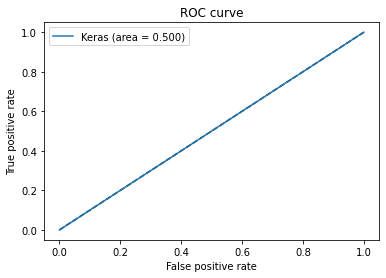

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,classification_report, confusion_matrix 
import matplotlib.pyplot as plt
y_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print("AUC : ", auc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.savefig("../images/ROC/ROC_d3.png")
plt.show()

In [25]:
print(accuracy_score(y_test, y_pred ))

0.8833287254630909


In [37]:
# Testing
estimatorsk = [('scale', StandardScaler()), ('rfne', KNeighborsClassifier(n_neighbors=10))]
pipek = Pipeline(estimatorsk)
    


pipek.fit(X_train,y_train)
                                                                                         
print(roc_auc_score(y_test, pipek.predict_proba(X_test)[:,1])) 

         

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8398873063287572


In [32]:
y_pre=pipek.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))      

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12780
           1       0.61      0.22      0.32      1688

   micro avg       0.89      0.89      0.89     14468
   macro avg       0.76      0.60      0.63     14468
weighted avg       0.87      0.89      0.87     14468



In [29]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier
estimators_rf = [('scale', StandardScaler()), ('rf',RandomForestClassifier(n_estimators=200,max_depth = 20))]
pipe_rf = Pipeline(estimators_rf)
                  
pipe_rf.fit(X_train,y_train)
                                                                           
print(roc_auc_score(y_test, pipe_rf.predict_proba(X_test)[:,1]))

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9223702801326124


In [30]:
y_pre=pipe_rf.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9027508985346973
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12780
           1       0.62      0.42      0.50      1688

   micro avg       0.90      0.90      0.90     14468
   macro avg       0.78      0.69      0.72     14468
weighted avg       0.89      0.90      0.89     14468



In [31]:
from sklearn.ensemble import ExtraTreesClassifier

estimators_erf = [('scale', StandardScaler()), ('rf',ExtraTreesClassifier(n_estimators=200,max_depth = 20))]
pipe_erf = Pipeline(estimators_erf)
                  
pipe_erf.fit(X_train,y_train)
                                                                           
print(roc_auc_score(y_test, pipe_erf.predict_proba(X_test)[:,1]))

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.919511404260211


In [32]:
y_pre=pipe_erf.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8993641139065524
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     12780
           1       0.66      0.29      0.40      1688

   micro avg       0.90      0.90      0.90     14468
   macro avg       0.78      0.63      0.67     14468
weighted avg       0.88      0.90      0.88     14468



In [39]:
estimatorsl = [('scale', StandardScaler()), ('rfne', LogisticRegression(penalty='l2'))]
pipel = Pipeline(estimatorsl)

pipel.fit(X_train,y_train)

print(roc_auc_score(y_test, pipel.predict_proba(X_test)[:,1]))

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8603323005436516


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [41]:
y_pre=pipel.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

0.8900331766657451
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12780
           1       0.58      0.22      0.32      1688

   micro avg       0.89      0.89      0.89     14468
   macro avg       0.74      0.60      0.63     14468
weighted avg       0.87      0.89      0.87     14468



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [12]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

estimatorsl = [('scale', MinMaxScaler()), ('rfne', ComplementNB())]
pipel = Pipeline(estimatorsl)

pipel.fit(X_train,y_train)

print(roc_auc_score(y_test, pipel.predict_proba(X_test)[:,1]))

0.7290574542568735


In [46]:
# example of usage of NodeTransformer
from NodeTransformer import NodeTransformer
estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=50,max_depth=5,dimension=50)), ('logreg',LogisticRegression(max_iter=500))]
pipe = Pipeline(estimators)

pipe.fit(X_train,y_train)   

print(roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.96it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.62it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.89it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 62.19it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.62it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.56it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.74it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.83it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.59it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.73it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.40it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.80it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.88it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 89.61it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.78it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.94it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.66it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.19it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.67it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.18it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.74it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.79it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.25it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.02it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.84it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.44it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.92it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.96it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.58it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.73it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.25it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.64it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.75it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.33it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.06it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.31it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.36it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.94it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.96it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.02it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.84it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 65.27it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 86.36it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.50it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.31it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 78.99it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.05it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.93it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.84it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.44it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

0.9077530149300225


In [47]:
y_pre=pipe.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

0.9013685374619851
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12780
           1       0.61      0.44      0.51      1688

   micro avg       0.90      0.90      0.90     14468
   macro avg       0.77      0.70      0.73     14468
weighted avg       0.89      0.90      0.89     14468



## statistical test for the random forest and extra trees models 

In [21]:
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from mlxtend.evaluate import paired_ttest_5x2cv

#cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores1 = cross_val_score(pipe_erf, X_train, y_train, scoring = 'accuracy', cv = cv1, n_jobs = -1)

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=pipe_rf, estimator2=pipe_erf,X=X_test,y=y_test, scoring='roc_auc', random_seed=1)
#t, p = paired_ttest_5x2cv(estimator1=pipe_rf, estimator2=pipek,X=X_train,y=y_train, scoring='accuracy', random_seed=1)#0.001 t-statistic 7.651

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_em

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site

P-value: 0.018, t-Statistic: 3.441


In [20]:
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from mlxtend.evaluate import paired_ttest_5x2cv

#cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores1 = cross_val_score(pipe_erf, X_train, y_train, scoring = 'accuracy', cv = cv1, n_jobs = -1)

# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=pipe_rf, estimator2=pipe_erf,X=X_train,y=y_train, scoring='roc_auc', random_seed=1)
#t, p = paired_ttest_5x2cv(estimator1=pipe_rf, estimator2=pipek,X=X_train,y=y_train, scoring='accuracy', random_seed=1)#0.001 t-statistic 7.651

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_em

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site

P-value: 0.045, t-Statistic: 2.649


In [34]:
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from mlxtend.evaluate import paired_ttest_5x2cv

#cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores1 = cross_val_score(pipe_erf, X_train, y_train, scoring = 'accuracy', cv = cv1, n_jobs = -1)

# check if difference between algorithms is real
#t, p = paired_ttest_5x2cv(estimator1=pipe_rf, estimator2=pipe_erf,X=X_train,y=y_train, scoring='roc_auc', random_seed=1)
t, p = paired_ttest_5x2cv(estimator1=pipe_rf, estimator2=pipe_erf,X=X_test,y=y_test, scoring='accuracy', random_seed=1)#0.001 t-statistic 7.651

# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_em

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site

P-value: 0.182, t-Statistic: 1.551


In [24]:
predict_w_val= pipe.predict_proba(X_val) #[np.argmax(i) for i in pipe.predict_proba(X_test)]
prediction_rf_val= pipe_rf.predict_proba(X_val) #[np.argmax(i) for i in pipe.predict_proba(X_test)]
pred_n_val = model.predict([X_val_transformed])


NameError: name 'model' is not defined

In [313]:
# Validation

In [64]:
from scipy.stats import ks_2samp
from sklearn.metrics import precision_recall_curve, auc,f1_score


prec_n,rec_n,thressholds_n= precision_recall_curve(y_val,pred_n_val[:,1])
prec_w,rec_w,thressholds_w= precision_recall_curve(y_val,predict_w_val[:,1])
prec_rf,rec_rf,thressholds_rf= precision_recall_curve(y_val,prediction_rf_val[:,1])

auc_n = auc(rec_n, prec_n)
auc_w = auc(rec_w, prec_w)
auc_rf = auc(rec_rf, prec_rf)

print(auc_n,auc_w,auc_rf)

auc_n = auc(rec_n, prec_n)
auc_w = auc(rec_w, prec_w)
auc_rf = auc(rec_rf, prec_rf)


0.5429551195855352 0.5570828214968483 0.5737954888261708


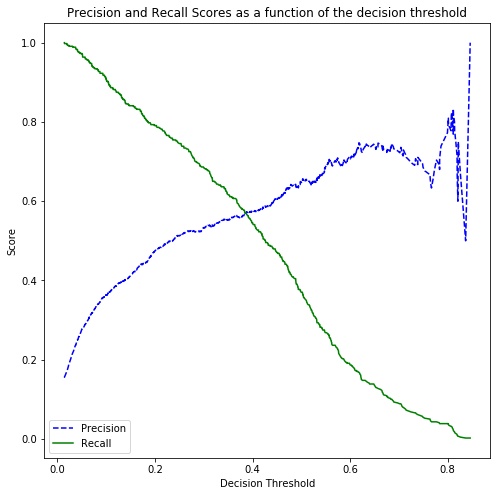

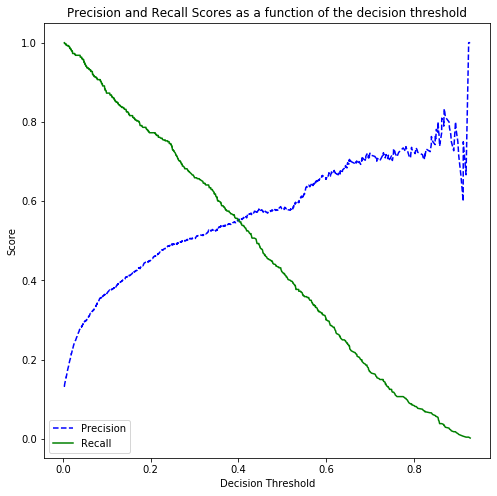

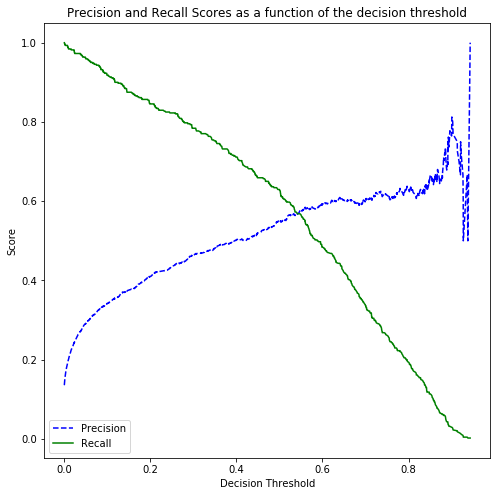

In [56]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

plot_precision_recall_vs_threshold(prec_rf,rec_rf,thressholds_rf)
plot_precision_recall_vs_threshold(prec_w,rec_w,thressholds_w)
plot_precision_recall_vs_threshold(prec_n,rec_n,thressholds_n)


In [57]:
pred_n = model.predict([X_test_transformed])
pred_w = pipe.predict_proba(X_test)
prediction_rf = pipe_rf.predict_proba(X_test)

Ks_2sampResult(statistic=0.17991429361349187, pvalue=8.195620083628961e-204)
Ks_2sampResult(statistic=0.2858031517832458, pvalue=0.0)


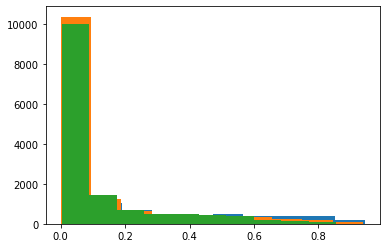

In [58]:
plt.hist(pred_n[:,1])
plt.hist(pred_w[:,1])
plt.hist(prediction_rf[:,1])

#different distributions
print(ks_2samp(pred_n[:,1],pred_w[:,1]))
print(ks_2samp(pred_n[:,1],prediction_rf[:,1]))


In [67]:
from scipy.stats import ks_2samp
from sklearn.metrics import precision_recall_curve, auc,f1_score


prec_n_t,rec_n_t,thressholds_n= precision_recall_curve(y_test,pred_n[:,1])
prec_w_t,rec_w_t,thressholds_w= precision_recall_curve(y_test,pred_w[:,1])
prec_rf_t,rec_rf_t,thressholds_rf= precision_recall_curve(y_test,prediction_rf[:,1])

auc_n_t = auc(rec_n_t, prec_n_t)
auc_w_t = auc(rec_w_t, prec_w_t)
auc_rf_t = auc(rec_rf_t, prec_rf_t)


auc_n_t = auc(rec_n_t, prec_n_t)
auc_w_t = auc(rec_w_t, prec_w_t)
auc_rf_t = auc(rec_rf_t, prec_rf_t)
print(auc_n_t,auc_w_t,auc_rf_t)




0.5632723458532698 0.5671018987801557 0.5851355676897843


In [59]:
prd = (prediction_rf[:,1]>0.4)
prd2 = (pred_w[:,1]>0.4)
prd3 = (pred_n[:,1]>0.57)

In [52]:
print(np.quantile(prediction_rf[:,1],0.95))
print(np.quantile(pred_w[:,1],0.95))
print(np.quantile(pred_n[:,1],0.95))

0.41188304357581307
0.5304889510222498
0.5571804642677307


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

print(confusion_matrix(y_test,prd))
print(confusion_matrix(y_test,prd2))
print(confusion_matrix(y_test,prd3))

print(classification_report(y_test,prd))

print(classification_report(y_test,prd2))
print(classification_report(y_test,prd3))




In [61]:
# Example of calculating the mcnemar test
import numpy as np
from mlxtend.evaluate import mcnemar_table



# The correct target (class) labels
y_target = np.array(y_test)

# Class labels predicted by model 1
y_model1 = np.array(prd)

# Class labels predicted by model 2
y_model2 = np.array(prd2)

tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)


from statsmodels.stats.contingency_tables import mcnemar
# define contingency table
table = tb
# calculate mcnemar test
result = mcnemar(table, exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')





[[12789   207]
 [  259  1213]]
statistic=207.000, p-value=0.018
Different proportions of errors (reject H0)


In [8]:
from sklearn.ensemble import StackingClassifier
from NodeTransformer import NodeTransformer

estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=200,max_depth=6,dimension=10)), ('logreg',LogisticRegression())]
pipe = Pipeline(estimators)

ests = [('rf', RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)),
  ('rf2', pipe)]

clf = StackingClassifier(estimators=ests, final_estimator=LogisticRegression())

clf.fit(X_train,y_train)   

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.24it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.90it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.38it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance at

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 80.79it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.54it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.99it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.09it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.74it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.72it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.88it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.22it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 77.13it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.70it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 95.13it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.52it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.21it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.08it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.33it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



0.9170832435130872


In [15]:
est0 = clf.estimators_[0]
est1 = clf.estimators_[1]

est0.feature_importances_

importances = est0.feature_importances_
std = np.std([tree.feature_importances_ for tree in est0.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



#print(roc_auc_score(y_test, est1.predict_proba(X_test)[:,1]))

Feature ranking:
1. feature 3 (0.407734)
2. feature 40 (0.195840)
3. feature 5 (0.052937)
4. feature 24 (0.047776)
5. feature 0 (0.040549)
6. feature 41 (0.032069)
7. feature 27 (0.030850)
8. feature 34 (0.029743)
9. feature 6 (0.027470)
10. feature 38 (0.020344)
11. feature 37 (0.016580)
12. feature 1 (0.013039)
13. feature 2 (0.011730)
14. feature 35 (0.011391)
15. feature 4 (0.006508)
16. feature 33 (0.006252)
17. feature 25 (0.004801)
18. feature 14 (0.004457)
19. feature 18 (0.004182)
20. feature 28 (0.003650)
21. feature 32 (0.003467)
22. feature 29 (0.003304)
23. feature 19 (0.003260)
24. feature 7 (0.003104)
25. feature 11 (0.002539)
26. feature 21 (0.001991)
27. feature 36 (0.001978)
28. feature 39 (0.001820)
29. feature 20 (0.001301)
30. feature 10 (0.001085)
31. feature 30 (0.001082)
32. feature 22 (0.001012)
33. feature 15 (0.000951)
34. feature 26 (0.000948)
35. feature 16 (0.000842)
36. feature 13 (0.000737)
37. feature 31 (0.000704)
38. feature 12 (0.000557)
39. feature 

Feature: 0, Score: -0.15754
Feature: 1, Score: 0.28134
Feature: 2, Score: -0.18956
Feature: 3, Score: 0.39139
Feature: 4, Score: 0.71407
Feature: 5, Score: 0.40136
Feature: 6, Score: -0.32701
Feature: 7, Score: 0.14720
Feature: 8, Score: 0.48775
Feature: 9, Score: -0.27087
Feature: 10, Score: -0.36481
Feature: 11, Score: 0.06097
Feature: 12, Score: -0.53173
Feature: 13, Score: -0.00765
Feature: 14, Score: -0.60395
Feature: 15, Score: 0.05479
Feature: 16, Score: 0.00957
Feature: 17, Score: -0.10476
Feature: 18, Score: -0.11898
Feature: 19, Score: -0.31841
Feature: 20, Score: 0.54234
Feature: 21, Score: 0.52077
Feature: 22, Score: -0.44968
Feature: 23, Score: 0.07379
Feature: 24, Score: -0.04465
Feature: 25, Score: 0.10182
Feature: 26, Score: 0.61248
Feature: 27, Score: -0.29055
Feature: 28, Score: 0.47508
Feature: 29, Score: -0.11496
Feature: 30, Score: 0.99954
Feature: 31, Score: -0.41253
Feature: 32, Score: 0.21990
Feature: 33, Score: 0.05971
Feature: 34, Score: -0.19968
Feature: 35, 

Feature: 1830, Score: -0.79583
Feature: 1831, Score: 0.07383
Feature: 1832, Score: -0.36620
Feature: 1833, Score: -0.22772
Feature: 1834, Score: 0.15019
Feature: 1835, Score: -0.17918
Feature: 1836, Score: -0.73625
Feature: 1837, Score: -0.36572
Feature: 1838, Score: 0.73540
Feature: 1839, Score: -0.15285
Feature: 1840, Score: -0.30518
Feature: 1841, Score: -0.30138
Feature: 1842, Score: 0.18129
Feature: 1843, Score: -0.92305
Feature: 1844, Score: 0.22028
Feature: 1845, Score: 0.07748
Feature: 1846, Score: -0.28012
Feature: 1847, Score: 1.04131
Feature: 1848, Score: 0.04332
Feature: 1849, Score: -0.28889
Feature: 1850, Score: -0.70974
Feature: 1851, Score: -0.49637
Feature: 1852, Score: -0.26933
Feature: 1853, Score: -1.00655
Feature: 1854, Score: 0.62960
Feature: 1855, Score: -0.57297
Feature: 1856, Score: -0.06008
Feature: 1857, Score: 0.93913
Feature: 1858, Score: -0.45340
Feature: 1859, Score: -0.49031
Feature: 1860, Score: -0.10225
Feature: 1861, Score: -0.35138
Feature: 1862, Sco

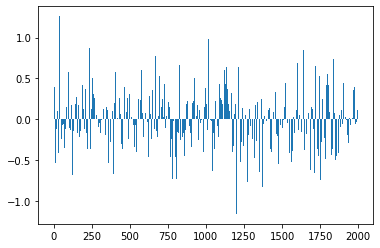

In [23]:
import matplotlib.pyplot as pyplot


importance = est1.steps[2][1].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()




In [125]:
from NodeTransformerExtremeTrees import NodeTransformerExtremeTrees

estimators = [('scale', StandardScaler()), ('rfne', NodeTransformerExtremeTrees(n_estimators=200,max_depth=7,dimension=10)), ('logreg',LogisticRegression())]
pipee = Pipeline(estimators)

pipee.fit(X_train,y_train)   

print(roc_auc_score(y_test, pipee.predict_proba(X_test)[:,1]))

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.94it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.30it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.06it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



0.9075927417677381
